In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
img = cv2.imread('Before.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mustache = cv2.imread('mustache.png',cv2.IMREAD_UNCHANGED)
glasses = cv2.imread('glasses.png',cv2.IMREAD_UNCHANGED)
glasses = cv2.cvtColor(glasses,cv2.COLOR_BGRA2RGBA)
mustache = cv2.cvtColor(mustache,cv2.COLOR_BGRA2RGBA)

In [3]:
eye_cascade = cv2.CascadeClassifier('frontalEyes35x16.xml')
nose_cascade = cv2.CascadeClassifier('Nose18x15.xml')

In [4]:
eyes = eye_cascade.detectMultiScale(img,1.1,5)
nose = nose_cascade.detectMultiScale(img)

In [5]:
x1,y1,w1,h1 = eyes[0]
x2,y2,w2,h2 = nose[0]
glasses = cv2.resize(glasses,(h1,w1))
print(glasses.shape)

(75, 165, 4)


In [6]:
for i in range(glasses.shape[0]):
    for j in range(glasses.shape[1]):
        if(glasses[i,j,3]>0):
            img[y1+i,x1+j,:] = glasses[i,j,:-1]

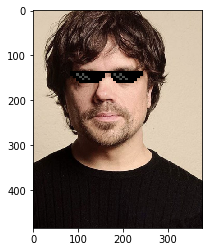

In [7]:
plt.imshow(img)

In [8]:
mustache  = cv2.resize(mustache,(w2,h2))
print(mustache.shape)

(56, 47, 4)


In [9]:
for i in range(mustache.shape[0]):
    for j in range(mustache.shape[1]):
        if mustache[i,j,3]>0:
            img[y2+i,x2+j,:] = mustache[i,j,:-1]

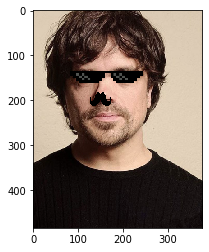

In [10]:
plt.imshow(img)

In [11]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite("img.jpg", img)

True

In [12]:
img = img.reshape((-1,3))

In [13]:
df = pd.DataFrame(img, columns=["Channel 1","Channel 2", "Channel 3"]).to_csv("new_pred.csv", index=False)